<a href="https://www.kaggle.com/code/senademirba/titanic-comparing-ml-models-roc-analysis?scriptVersionId=265575153" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd   # tablo (excel gibi) verileri okumak ve düzenlemek için
import numpy as np    # matematiksel işlemler için
import matplotlib.pyplot as plt  # grafik çizmek için
import seaborn as sns  # daha güzel grafikler için

In [2]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(train.shape) #satır x sütun sayısı
print(test.shape)

(891, 12)
(418, 11)


In [5]:
train.isnull().sum() # eksik sütunları bulmak için age ve cabin

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train['Survived'].value_counts() #hedef değişkene bakalım

Survived
0    549
1    342
Name: count, dtype: int64

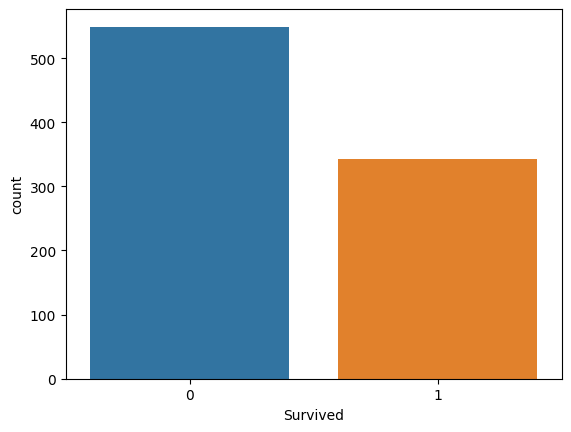

In [7]:
sns.countplot(data=train, x='Survived') # basitçe görselleştirelim
plt.show()

In [8]:
train["Survived"].value_counts() #dağılıma bakalım hedef değişkenin

Survived
0    549
1    342
Name: count, dtype: int64

In [9]:
train.info() #her sütunun türleri, eksik değerleri ve temel bilgilerini görelim

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train.describe() #sayısal sütunların özet istatistikleri

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train.isnull().sum() #eksik değerleri sayalım

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
train["Age"] = train["Age"].fillna(train["Age"].mean()) #yaş önemli eksik yerleri ortalama değerler ile doldularım
test["Age"] = test["Age"].fillna(test["Age"].mean())

train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0]) #binilen limanların en sık olanını mod ile ilk değeri yani en çok binilen limana göre boş yerleri dolduruyoruz

In [13]:
train.isnull().sum() #kontrol edelim boş var mı

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [14]:
train["Sex"] = train["Sex"].map({"male": 0, "female": 1})#map ile kadın ve erkekleri sayısala cevireliö
test["Sex"] = test["Sex"].map({"male":0, "female":1})

# Fare eksik değerini dolduralım (test setinde 1 tane boş var)
test["Fare"] = test["Fare"].fillna(test["Fare"].median())

In [15]:
train = pd.get_dummies(train, columns= ["Embarked"], drop_first=True) #get_dummies kategorik değişkeni ayrı sütunlara böler, drop_first bir sütunu atar gereksiz tekrar olmaması için
test = pd.get_dummies(test, columns= ["Embarked"], drop_first= True) #one hot encoding ile embarked sütununu sayısal hale getirelim

In [16]:
#sırayla farklı modellerde de denemeler yapıp mantıklarını öğrenelim

In [17]:
### yapılacaklar:

#Sınıflandırma Modellerini Dene 
    #Logistic Regression
    #KNN
    #Naive Bayes (Gaussian)
    #Decision Tree
    #Random Forest 
    #XGBoost/LightGBM 
    #SVM (Linear ve RBF kernel) 

#Her Model İçin Yap:
    #- Feature engineering (yaş grupları, title extraction, family size)
    #- Hyperparameter tuning (GridSearchCV) 
    #- Cross-validation (K-Fold) 
    #- Feature importance çıkar 
    #- Confusion matrix + ROC curve çiz 
    #- Hangi model neden iyi/kötü çalıştı **YAZ** 

#Notebooku Şöyle Yapılandır:** 
    #1. EDA (Exploratory Data Analysis) 
    #2. Feature Engineering 
    #3. Her model için ayrı section 
    #4. Model Comparison tablo halinde
    #5. En iyi modelin detaylı analizi 
    #6. Kaggle'a submission yapcam

In [18]:
# Feature Engineering 
#çalışır ve idempotent (tekrar çalıştırılabilir)

# 1. FamilySize ve IsAlone
for df in [train, test]:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# 2. AgeBand yaş grupları #Ageband yaşları kategoriye ayırcaz bazı modeller daha iyi çalıştığı için hazırda varsa tekrar oluşturmasın diye önlem de koyuyoruz
bins = [0, 12, 18, 60, 120]  # yaş aralıkları
for df in [train, test]:
    df['AgeBand'] = pd.cut(df['Age'], bins=bins, labels=False, include_lowest=True) #AgeBand: Bu sütunu üretmek istersek Age üzerine pd.cut() ile eklenmeli 
    #(ama olmazsa da model çalışır, sadece biraz daha zayıf olabilir).

# 3. Title extraction isimden unvan çıkar 
##titlelardan mr, mrs, miss falan çıkarıyoruz
#fonksiyon isimden başlığı çıkarır, nadir başlıkları other yapacak ve sayısallaştıracak
def extract_title(df):
    title = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)  # regex ile başlık
    # Nadir başlıkları Other yap
    rare_titles = ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona']
    title = title.replace(rare_titles, 'Other')
    # normalize
    title = title.replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})
    mapping = {"Mr":1, "Miss":2, "Mrs":3, "Master":4, "Other":5}
    return title.map(mapping).fillna(5).astype(int)

for df in [train, test]:
    df['Title'] = extract_title(df)

# 4. Cabin bilgisi boolean titanicde cogu yok
for df in [train, test]:
    if 'Cabin' in df.columns:
        df['CabinBool'] = df['Cabin'].notnull().astype(int)
    else:
        df['CabinBool'] = 0  # yoksa 0 ile doldur

# Kontrol
print("Train new cols sample:\n", train[['FamilySize','IsAlone','AgeBand','Title','CabinBool']].head())
print("\nTest new cols sample:\n", test[['FamilySize','IsAlone','AgeBand','Title','CabinBool']].head())


Train new cols sample:
    FamilySize  IsAlone  AgeBand  Title  CabinBool
0           2        0        2      1          0
1           2        0        2      3          1
2           1        1        2      2          0
3           2        0        2      3          1
4           1        1        2      1          0

Test new cols sample:
    FamilySize  IsAlone  AgeBand  Title  CabinBool
0           1        1        2      1          0
1           2        0        2      3          0
2           1        1        3      1          0
3           1        1        2      1          0
4           3        0        2      3          0


In [19]:
#x ve y güncelleyelim model için.
#Yeni oluşturduğumuz feature’ları modele dahil ettik. Model artık sadece temel bilgiler değil, aile büyüklüğü, başlık, yaş kategorisi gibi ipuçlarını da kullanacak.

#hedef değişken
y = train['Survived']

#özellikler
x = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
           'Embarked_Q', 'Embarked_S', 'FamilySize', 'IsAlone', 'AgeBand', 'Title', 'CabinBool']]


In [20]:
from sklearn.model_selection import train_test_split

#train_test_split 4 değer döner x eğitim, x test doğrulama, y eğitim, y test doğrulama
#modeli test etmke için veriyi ikiye böleriz 80 eğitim 20 test
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42) #random_state=42 hep aynı şekilde bölsün diye sabit sayo

In [21]:
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape) #kontrol edelim doğru mu bölündü

(712, 13) (179, 13) (712,) (179,)


In [22]:
#Özellikleri aynı ölçeğe getirmek için standardizasyon yapıyoruz (özellikle KNN, SVM gibi algoritmalar için önemli)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)# Eğitim verisinden öğrenip dönüştür
x_val_scaled = scaler.transform(x_val)##Doğrulama/test verisi eğitim verisinin ölçeğine göre dönüştürülüyor, böylece model “geleceği görmüş” gibi olmuyor.

# özellikleri ölçeklendiriyoruz. Ölçekleme parametreleri (ortalama ve standart sapma) sadece eğitim verisinden öğreniliyor.




In [23]:
###lojistic regression: İkili sınıflandırma için kullanılır.0 veya 1 (Survived) tahmin eder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#modeli oluşturalım
log_model = LogisticRegression(max_iter= 1000) #max iter modelin yeterli deneme yapıp öğrenebilmesi için

#eğitim versiyonuyla modeli eğitiyoruz
log_model.fit(x_train_scaled, y_train)

#doğrulama verisiyle tahmin yapıyoruz
y_pred_log = log_model.predict(x_val_scaled)

#doğruluk skorumuza bakalım
log_acc = accuracy_score(y_val, y_pred_log)
print("Logistic Regression Accuracy: ", log_acc)

Logistic Regression Accuracy:  0.7932960893854749


doğruluk: 0.6759776536312849
Confusion Matrix:
 [[101   4]
 [ 54  20]]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


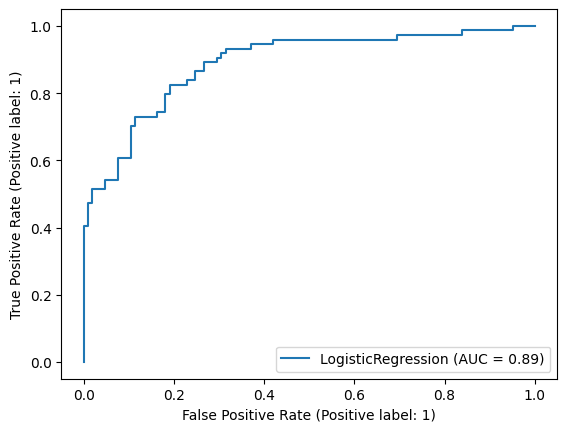

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, RocCurveDisplay

#doğrulama verisi ile tahmin yapıyoruz
y_pred_log = log_model.predict(x_val)

#tahminlerin doğruluğunu hesaplıyoruz
print("doğruluk:", accuracy_score(y_val, y_pred_log)) #predict doğrulama verisi için modelin tahmin ettiği sonuçlar, accuracy score başarım oranı

# Confusion matrix : Modelin hangi tür hatalar yaptığını gösterir.True Positive, False Positive, True Negative, False Negative.
cm = confusion_matrix(y_val, y_pred_log)
print("Confusion Matrix:\n", cm)

#confusion matrix sonucu açıklaması:
#[[86 19]  Gerçekte 0 olanlar: 86 doğru (TN), 19 yanlış (FP)
#[18 56]]  Gerçekte 1 olanlar: 56 doğru (TP), 18 yanlış (FN)


# ROC Curve: Modelin sınıflandırma yeteneğini grafik olarak gösterir.
roc_display = RocCurveDisplay.from_estimator(log_model, x_val_scaled, y_val)

KNN Accuracy: 0.8212290502793296
Confusion Matrix: 
 [[90 15]
 [17 57]]


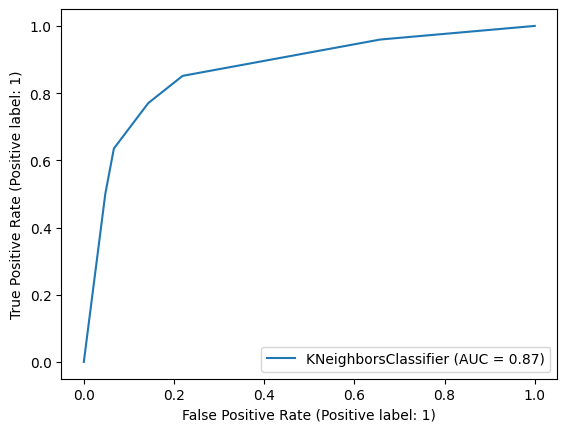

In [25]:
### K-Nearest Neighbors KNN modelini ekleyelim 

#KNN mantığı yeni bir veri geldiğinde en yakın k komşusuna bakar ve çoğunluğun sınıfını tahmin eder
#sayısal özelliklerle daha iyi çalışır, kategorik değişkenleri sayısala çevirmiştik zaten sex, embarked

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#modeli oluşturalım
knn_model = KNeighborsClassifier(n_neighbors = 5) #k=5 yani en yakın 5 komşuya baksın

#modeli eğitim verisi ile eğit (ölçeklenmiş veriler)
knn_model.fit(x_train_scaled, y_train)

#tahmin yapsın
y_pred_knn = knn_model.predict(x_val_scaled) #doğrulama verisi ile tahmin etsin

#doğruluk ve confusion matrixi versin
#accuracy Modelin tahminlerinin ne kadar doğru olduğunu gösterir.
# Confusion matrix : Modelin hangi tür hatalar yaptığını gösterir.True Positive, False Positive, True Negative, False Negative.
knn_acc = accuracy_score(y_val, y_pred_knn)
print("KNN Accuracy:", knn_acc)
print("Confusion Matrix: \n", confusion_matrix(y_val, y_pred_knn))

# ROC Curve
roc_display = RocCurveDisplay.from_estimator(knn_model, x_val_scaled, y_val)

Niave Bayes Accuracy: 0.7877094972067039
Confusion Matrix: 
 [[79 26]
 [12 62]]


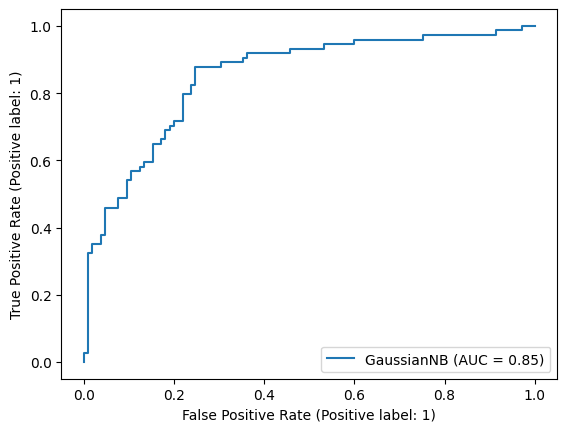

In [26]:
### Gaussian Naive Bayes GNB modelini deneyelim

#Gaussian Naive Bayes GNB mantığı sınıflandırma algoritması, bir gözlemin hangi sınıfa ait olduğunu tahmin etmek için kullanılır.
#GaussianNB, her özelliğin (feature) birbirinden bağımsız olduğunu varsayar ve sürekli değerlerin Gaussian (normal) dağılıma uyduğunu kabul eder.
#Özelliklerimiz: Age, Sex, Pclass, Fare, FamilySize, IsAlone, Title, vb.
#Gaussian Naive Bayes, bu özelliklerin sürekli sayısal değerler olduğunu varsayar ve her özelliğin normal (Gaussian) dağılıma uyduğunu kabul eder.
# mantığı her sayısal özellik kendi ortalama ve standart sapmasıyla sınıf dağılımına göre değerlendirilir.
#Naive Bayes, sınıflandırma problemlerinde özellikle veri az olduğunda veya hızlı tahmin gerektiğinde kullanılır.

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

#modeli oluşturalım
nb_model = GaussianNB() #sürekli sayısal veriler için güzel

#modeli eğitelim
nb_model.fit(x_train_scaled, y_train)

#doğrulama seti ile tahmin
y_pred_nb = nb_model.predict(x_val_scaled)

#performansı ölçelim modeliimizin
nb_acc = accuracy_score(y_val, y_pred_nb) #doğruluk
nb_cm = confusion_matrix(y_val, y_pred_nb) #confusion matrix

print("Niave Bayes Accuracy:", nb_acc)
print("Confusion Matrix: \n", nb_cm)

# ROC Curve: Modelin sınıflandırma yeteneğini grafik olarak gösterir
roc_display = RocCurveDisplay.from_estimator(nb_model, x_val_scaled, y_val)

Decision Tree Accuracy: 0.7653631284916201
Confusion Matrix:
 [[84 21]
 [21 53]]


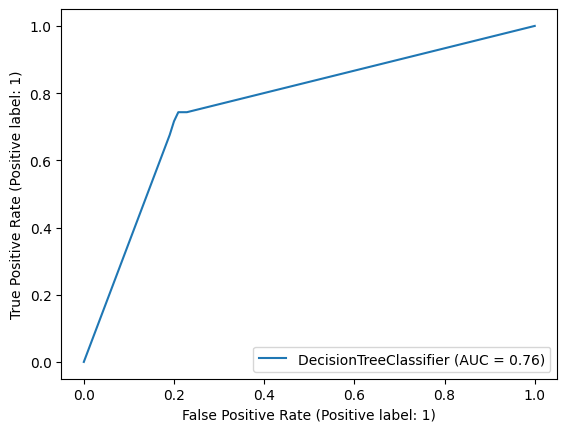

In [27]:
### Decision Tree modelini ekleyelim

#veri setindeki özellikleri kullanarak karar kuralları oluşturur ve her gözlemi sınıflara ayırır
#Özellikler: Pclass, Sex, Age, Fare, FamilySize, IsAlone, Title. Amaç: Her yol ayrımında özelliğe göre veri setini böler, sonunda hangi yol daha çok 0 veya 1 içeriyorsa tahmin o sınıf olur.
#mantığı ağaç dallanma yaparak çalışır. her düğüm bir özellik seçer ve veri setini böler.
#matematiksel anlamına da bak.
#baslangıçta tüm veri kök düğümde. her özellik için bölme uygula, gini veya entropy ile en iyi bölmeyi seç.
#veri alt gruplara ayrılır. yaprak düğüm saf olduğunda veya maks derinliğe ulaştığında durur.
#avantajı veriyi görsel olarak anlamak kolay, özellikler arası etkileşimi yakalar, sayısal ve kategorik veride çalışır.
#dejavantajı ağa. derinleşirse overffitting yapabilirç küçük değişiklerde ağaç tamamen değiişebilir yani kararsızdır.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#modeli oluştrualım
dt_model = DecisionTreeClassifier(random_state = 42)

# eğitim verisiyle eğit
#ağaç tabanlılarda scale edilmiş veri kullanmaya gerek yok ama sonda modelleri karşılaştıracağımız için scale edilmiş kullanıyoruz
dt_model.fit(x_train_scaled, y_train)  

#doğrulama verisiyle tahmin
y_pred_dt = dt_model.predict(x_val_scaled)

#doğruluk ve confusion matrixi görelim
dt_acc = accuracy_score(y_val, y_pred_dt)
dt_cm = confusion_matrix(y_val, y_pred_dt)

print("Decision Tree Accuracy:", dt_acc)
print("Confusion Matrix:\n", dt_cm)

# ROC Curve
roc_display = RocCurveDisplay.from_estimator(dt_model, x_val_scaled, y_val)

Random Forest Accuracy: 0.8268156424581006
Confusion Marrix:
 [[92 13]
 [18 56]]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


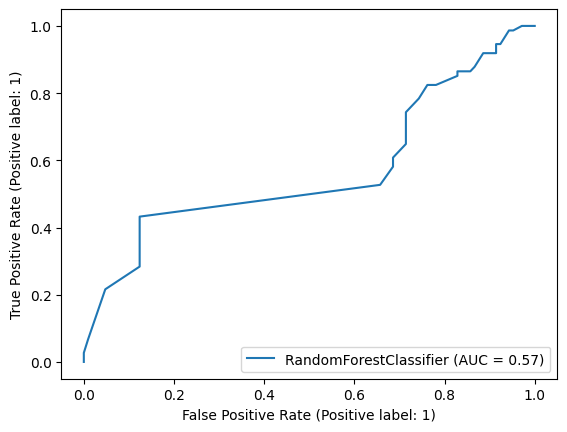

In [28]:
### Random Forest

#tek bir karar ağacı yerine birden fazla karar ağacı oluşturur
#her ağaç rastgele seçilmiş veri ve özellikler ile eğitilir
#sonuçta çoğunluk oylamasıyla karar verir. böyle overfitting problemini azaltır ve daha yüksek doğrulukta sonuç verir

from sklearn.ensemble import RandomForestClassifier

#modelimiz
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)#Random Forest’te kaç tane karar ağacı oluşturulacağını belirler, çok ağaç yavaş az ağaç hızlı

#modeli eğitelim
#ağaç tabanlılarda scale edilmiş veri kullanmaya gerek yok ama sonda modelleri karşılaştıracağımız için scale edilmiş kullanıyoruz
#uyarı çıkarsa (/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
#warnings.warn() gibi scale edilmiş veriye uygularsan çıkabiliyor çünkü x_train_scaled artık NumPy array tipinde ve orijinal veri setindeki sütun isimlerini içermiyor. Ama model yine çalışır, sadece bazı fonksiyonlar (RocCurveDisplay.from_estimator) sütun isimlerini beklediği için uyarı veriyor
rf_model.fit(x_train_scaled, y_train)

#doürulama verisi ile tahmin yap
y_pred_rf = rf_model.predict(x_val_scaled)

#doğruluk ve confusion matriximiz
print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
print("Confusion Marrix:\n", confusion_matrix(y_val, y_pred_rf))

# ROC Curve
roc_display = RocCurveDisplay.from_estimator(rf_model, x_val, y_val)

SVM Linear Accuracy: 0.8044692737430168
Confusion Matrix:
 [[87 18]
 [17 57]]


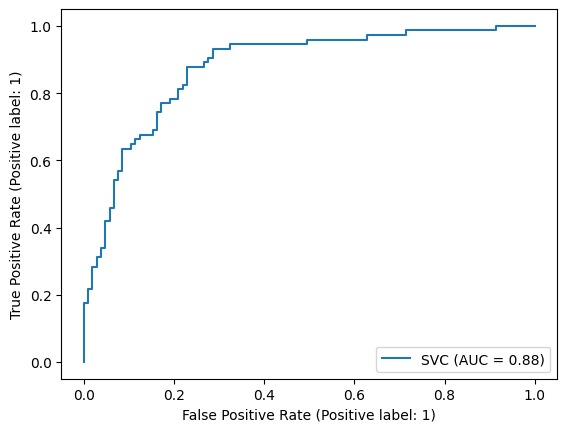

In [29]:
### SVM 

#SVM (Support Vector Machine) sınıflandırma ve regresyon için kullanılan güçlü bir makine öğrenmesi algoritması
#temel mantık veriyi 0 ve 1 olarak ayırcak en iyi çizgi 2D olarak çizgi veya düzlem bulur
#bu çizgi veri ayırıcı iki sınıf araasında maks "marj" en yakın veri noktalarına uzaklık sağlayacak şekilde seçilir
#destek vektörleri: sınıfları ayırmakta kritik verilerdir. sınıflandırma sınırını bu noktalar belirler
#kernel kullanımı: veriler lineer olarak ayrılamıyorsa , kernel fonksitonlar yani RBF, Polynomial vb ile veriyi daha yüksek boyuta taşıyıp lineer olarak ayırabiliriz
# AMAÇ overfittingi önlemek tabii ki ve ölçeklendirilmiş (scale ettiğimiz) verilerle performansı arttırmak, sınıflandırmayı doğru yapmak

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, RocCurveDisplay

#Linear kernel SVM
svm_linear = SVC(kernel='linear', probability=True, random_state=42)#probability=True parametresi, ROC curve çizmek için gerekli.
svm_linear.fit(x_train_scaled, y_train)

#tahmin
y_pred_svm_linear = svm_linear.predict(x_val_scaled)

#performansımız
svm_linear_acc = accuracy_score(y_val, y_pred_svm_linear)
svm_linear_cm = confusion_matrix(y_val, y_pred_svm_linear)

print("SVM Linear Accuracy:", svm_linear_acc)
print("Confusion Matrix:\n", svm_linear_cm)

# ROC Curve
roc_display_linear = RocCurveDisplay.from_estimator(svm_linear, x_val_scaled, y_val)

SVM RBF Accuracy: 0.8156424581005587
Confusion Matrix:
 [[92 13]
 [20 54]]


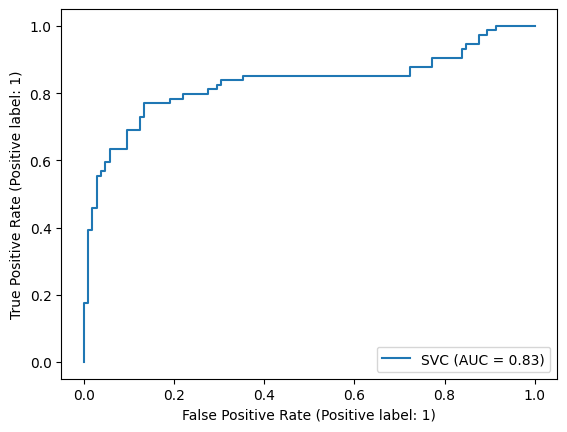

In [30]:
#RBF kernel SVM
svm_rbf = SVC(kernel='rbf', probability=True, random_state=42)
svm_rbf.fit(x_train_scaled, y_train)

#tahmin
y_pred_svm_rbf = svm_rbf.predict(x_val_scaled)

#performans
svm_rbf_acc = accuracy_score(y_val, y_pred_svm_rbf)
svm_rbf_cm = confusion_matrix(y_val, y_pred_svm_rbf)

print("SVM RBF Accuracy:", svm_rbf_acc)
print("Confusion Matrix:\n", svm_rbf_cm)

# ROC Curve
roc_display_rbf = RocCurveDisplay.from_estimator(svm_rbf, x_val_scaled, y_val)

XGBoost Accuracy: 0.8379888268156425
XGBoost Confusion Matrix:
 [[93 12]
 [17 57]]


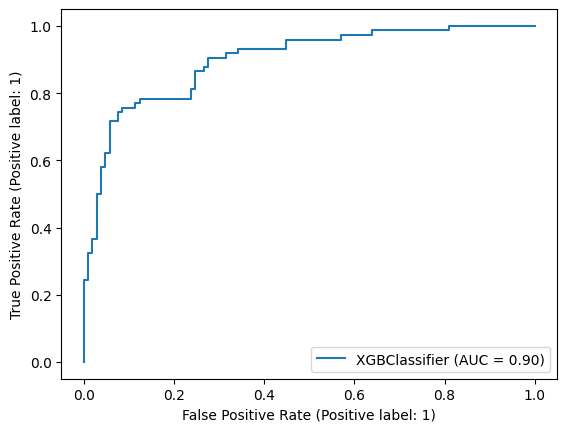

In [31]:
### XGBoost

#Gradient Boosting tabanlı güçlü bir sınıflandırıcı eksik veri ve karmaşık ilişkilerde yüksek performans

from xgboost import XGBClassifier
from sklearn.metrics import RocCurveDisplay

#modelimiz
xgb_model = XGBClassifier(random_state = 42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(x_train_scaled, y_train)

#eğitelim scale edilmiş verimizle
y_pred_xgb = xgb_model.predict(x_val_scaled)

#performans
acc = accuracy_score(y_val, y_pred_xgb)
cm = confusion_matrix(y_val, y_pred_xgb)

print("XGBoost Accuracy:", acc)
print("XGBoost Confusion Matrix:\n",cm)

RocCurveDisplay.from_estimator(xgb_model, x_val_scaled, y_val)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 229
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

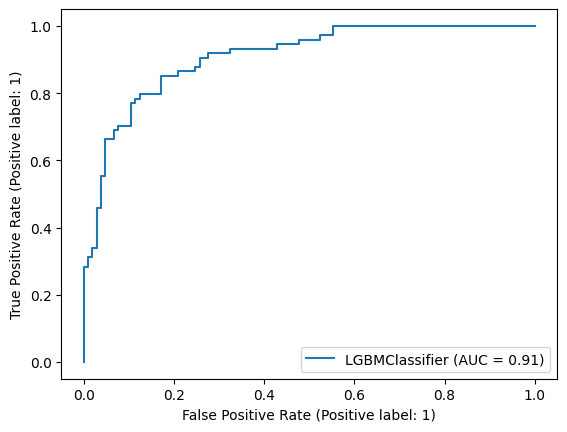

In [32]:
### LightGBM

#amaç XGboost ile benzer ama büyük veri ve hızlı eğitim için optimize edilmiş Gradient Boosting
#daha hizli bellek dostu büyük verilerle arası iyi

from lightgbm import LGBMClassifier

#modelimiz
lgb_model = LGBMClassifier(random_state=42)

#scale edilmiş veri ile eğitelim
lgb_model.fit(x_train_scaled, y_train)

y_pred_lgb = lgb_model.predict(x_val_scaled)

print("LightGBM Accuracy:", accuracy_score(y_val, y_pred_lgb))
print("LightGBM Confusion Matrix:\n", confusion_matrix(y_val, y_pred_lgb))

RocCurveDisplay.from_estimator(lgb_model, x_val_scaled, y_val)

#NOT Uyarılar (No further splits with positive gain) aslında modelin daha fazla bölünme yapacak faydalı bilgi bulamadığını söylüyor küçük veri setlerinde normaldir ve performansı etkilemez.

In [33]:
### şimdi tüm modellerimizi karşılaştırmaya geldik. ROC eğrilerini karşılaştıracağız

<Figure size 1000x800 with 0 Axes>

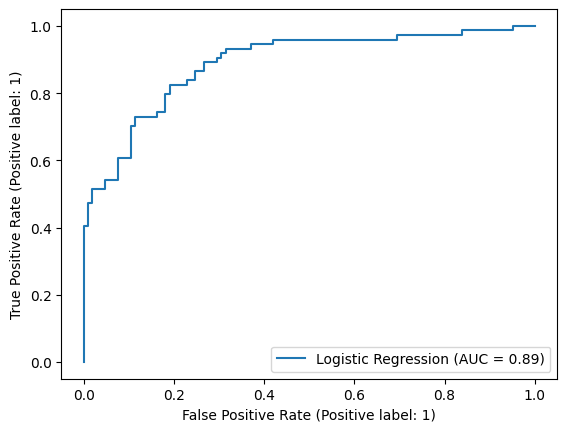

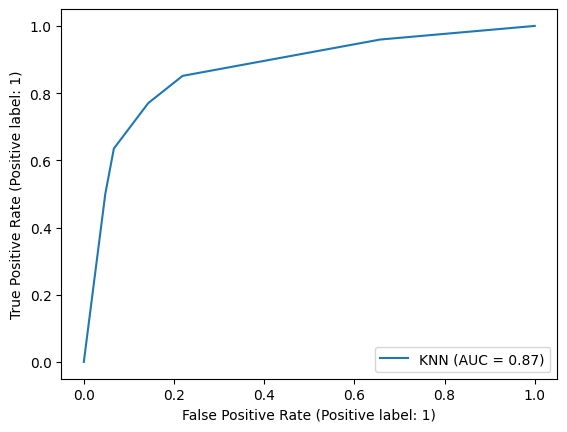

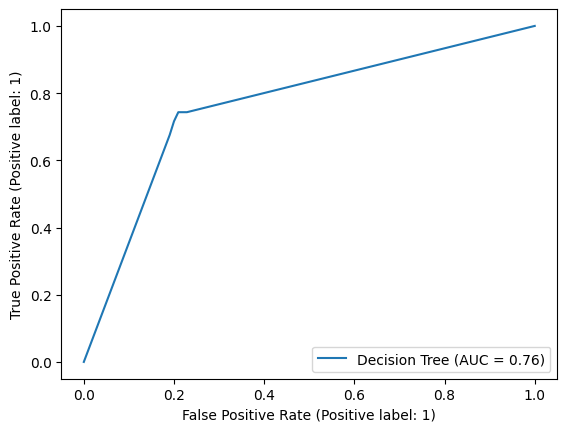

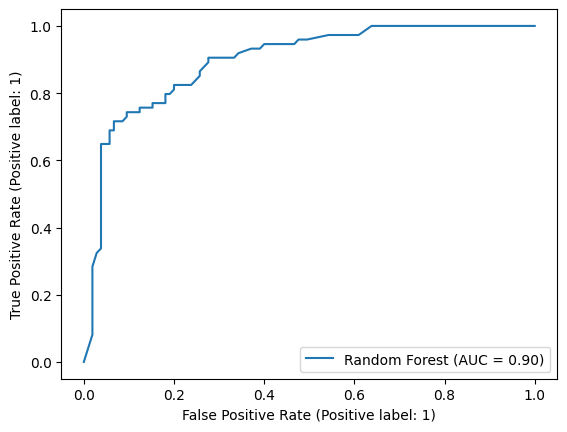

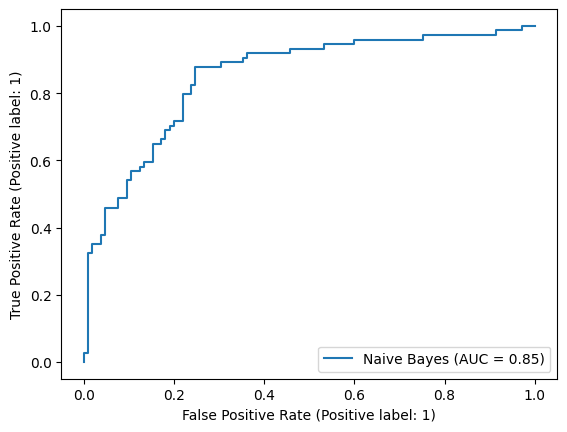

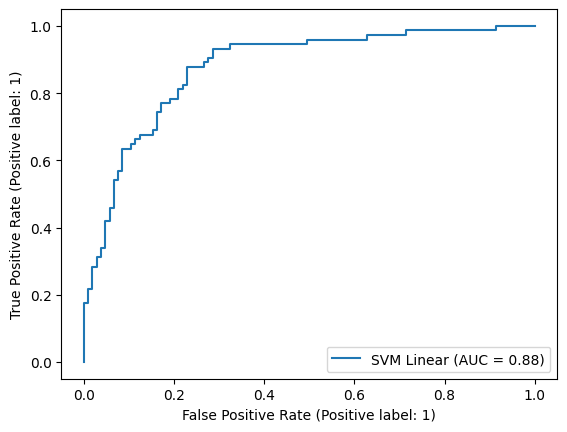

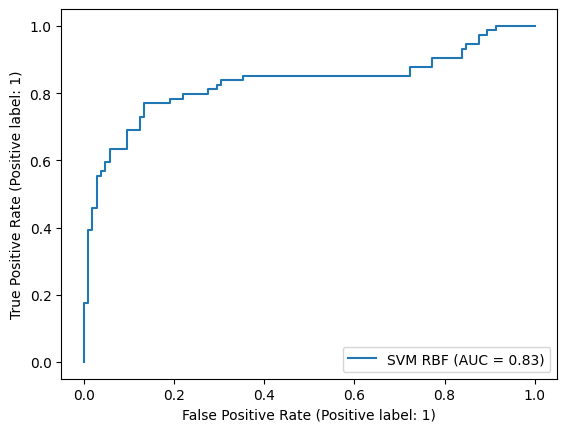

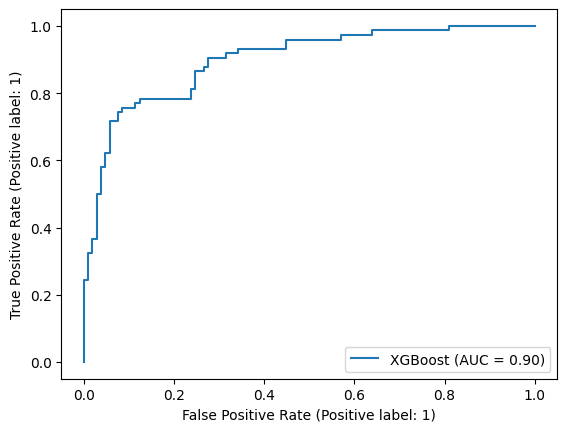

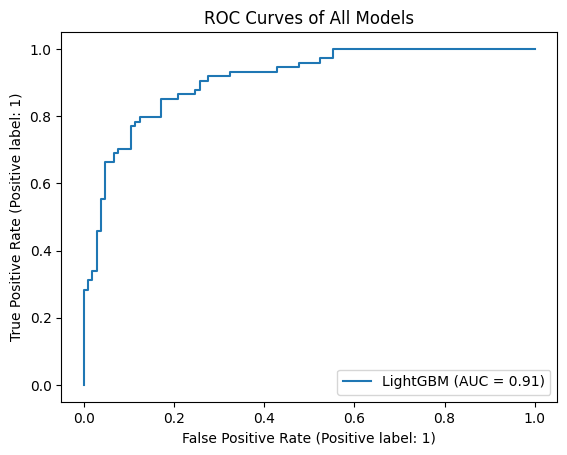

In [34]:
#grafik olarak görelim

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(10,8)) #grafik boyutunu ayarlıyoruz

#tüm modelleri bir listeye alıyoryz
models = [
    ("Logistic Regression", log_model),
    ("KNN", knn_model),
    ("Decision Tree", dt_model),
    ("Random Forest", rf_model),
    ("Naive Bayes", nb_model),
    ("SVM Linear", svm_linear),
    ("SVM RBF", svm_rbf),
    ("XGBoost", xgb_model),
    ("LightGBM", lgb_model)
]

#listeyi döngüye alalım tek tek ROC çizdirelim
#Modelin tahmin olasılıklarını kullanarak ROC eğrisini çiziyor. x_val_scaled ve y_val: doğrulama verisi ve gerçek etiketler.name=name: her ROC eğrisini kendi model adıyla etiketliyor.
for name, model in models:
    RocCurveDisplay.from_estimator(model, x_val_scaled, y_val, name=name)

plt.title("ROC Curves of All Models")
plt.show()

In [35]:
# Boş listeler oluşturuyoruz
model_names = []
accuracies = []
roc_aucs = []

# Döngü ile her modelin Accuracy ve ROC AUC skorlarını hesaplayalım

#accuracy modelin doğru tahmin sayısı / toplam örnek sayısıdır. basit ve anlaşılır ölçüm.
#Sınıflar dengesizse yanıltıcı olabilir. Örneğin %90 ‘0’ olan bir veri setinde tümünü 0 tahmin eden modelin doğruluğu %90 olur ama hiçbir 1 sınıfını yakalayamaz.

#ROC AUC skoru, modelin sınıflara ait olasılık tahminlerini kullanır. Modelin pozitif ve negatif sınıfları ayırma yeteneğini ölçer.
#ROC eğrisi: True Positive Rate (TPR) ve False Positive Rate (FPR) değerlerini değişik eşik değerleri için çiziyor.
#ROC AUC → Bu eğrinin altında kalan alan, modelin sınıfları ayırma performansını gösteriyor (0.5 = rastgele, 1 = mükemmel).

#Bazı modeller (LogisticRegression, RandomForest) predict_proba metoduna sahip, yani her sınıfın olasılığını döndürür.
#SVM gibi bazı modeller ise predict_proba sağlamaz, bunun yerine decision_function kullanılır

for name, model in models:
    # Tahmin
    y_pred = model.predict(x_val_scaled)
    # Olasılık tahmini (ROC AUC için)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(x_val_scaled)[:,1] #[:,1] → pozitif sınıfın (1 / Survived) olasılığı.
    else:  # SVM gibi predict_proba yoksa decision_function kullan
        y_proba = model.decision_function(x_val_scaled)
    
    # Skorları kaydet
    model_names.append(name)
    accuracies.append(accuracy_score(y_val, y_pred))
    roc_aucs.append(roc_auc_score(y_val, y_proba))

# Sonuçları tablo olarak gösterelim
results_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracies,
    "ROC AUC": roc_aucs
})

# Tabloyu Accuracy olarak sıralayabiliriz
results_df = results_df.sort_values(by="Accuracy", ascending=False)
results_df


,Model,Accuracy,ROC AUC
8,LightGBM,0.843575,0.909138
7,XGBoost,0.837989,0.898584
3,Random Forest,0.826816,0.895431
1,KNN,0.821229,0.870592
6,SVM RBF,0.815642,0.829472
5,SVM Linear,0.804469,0.876834
0,Logistic Regression,0.793296,0.888417
4,Naive Bayes,0.787709,0.849035
2,Decision Tree,0.765363,0.764479


In [36]:
#SONUÇ: 
#En yüksek Accuracye olan modeli bulabiliriz.
#En yüksek ROC AUC olan modeli bulabiliriz.
#Eğer Accuracy ve ROC AUC farklı modelleri gösteriyorsa, ROC AUC genellikle veri dengesizliğinde daha güvenilir bir metriği temsil edypr ROC AUC göre seçim yaparız

# En yüksek Accuracy'ye sahip model
best_acc_model = results_df.iloc[0]
print("En iyi Accuracy modeli:\n", best_acc_model)

# En yüksek ROC AUC'ya sahip model
best_roc_model = results_df.sort_values(by="ROC AUC", ascending=False).iloc[0]
print("\nEn iyi ROC AUC modeli:\n", best_roc_model)

En iyi Accuracy modeli:
 Model       LightGBM
Accuracy    0.843575
ROC AUC     0.909138
Name: 8, dtype: object

En iyi ROC AUC modeli:
 Model       LightGBM
Accuracy    0.843575
ROC AUC     0.909138
Name: 8, dtype: object


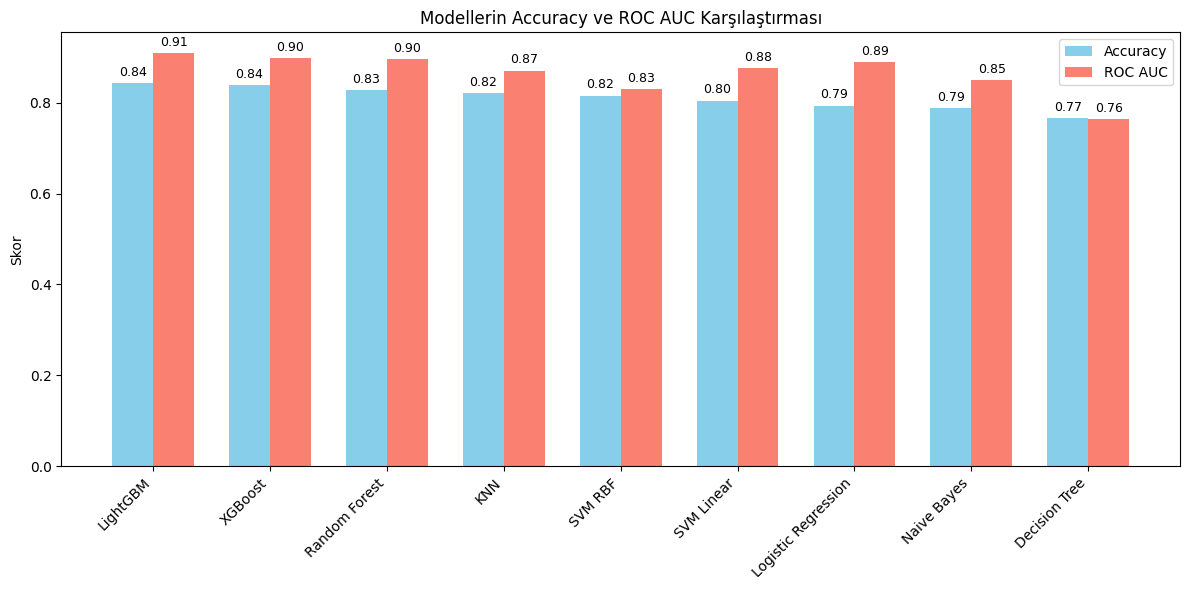

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Modeller ve skorlar
models_list = results_df["Model"]
accuracy_list = results_df["Accuracy"]
roc_auc_list = results_df["ROC AUC"]

x = np.arange(len(models_list))  # modellerin x konumu
width = 0.35  # bar genişliği

fig, ax = plt.subplots(figsize=(12,6))

# Accuracy barları
bars1 = ax.bar(x - width/2, accuracy_list, width, label='Accuracy', color='skyblue')

# ROC AUC barları
bars2 = ax.bar(x + width/2, roc_auc_list, width, label='ROC AUC', color='salmon')

# Etiketler ve başlık
ax.set_ylabel('Skor')
ax.set_title('Modellerin Accuracy ve ROC AUC Karşılaştırması')
ax.set_xticks(x)
ax.set_xticklabels(models_list, rotation=45, ha='right')
ax.legend()

# Skor değerlerini barların üzerine yazalıım
for bar in bars1:
    height = bar.get_height() #yükseklilleri
    #anatasyon eklemek için. 2f ondalık için. xy=(bar.get_x() + bar.get_width() / 2, height) ise tam ortaya koymayı sağlıyor
    #xytext=(0,3) Metni biraz yukarı kaydırır. textcoords="offset points" kaydırmayı puan cinsinden yapar. 
    #ha='center', va='bottom' metni yatayda ortalıyor ve dikeyde çubuğun üstünden başlatıyor
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0,3), textcoords="offset points", ha='center', va='bottom', fontsize=9)
for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0,3), textcoords="offset points", ha='center', va='bottom', fontsize=9)

#tight_layout() grafik ve etiketlerin üst üste binmesini engeller, kenar boşluklarını ayarlar
plt.tight_layout()
plt.savefig("scores_comparison.png")
plt.show()


İlk LightGBM
Accuracy: 0.8435754189944135
Confusion Matrix:
 [[92 13]
 [15 59]]
ROC AUC: 0.9091377091377091


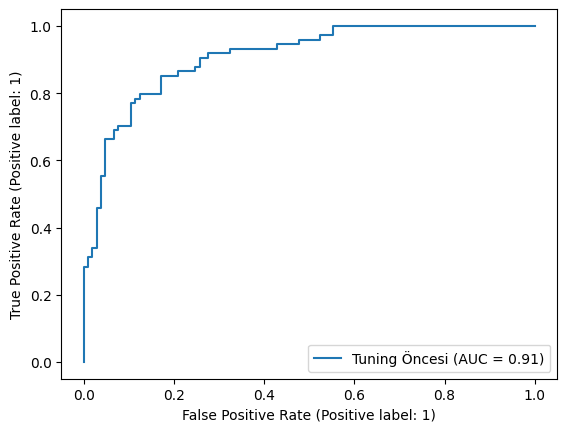

In [38]:
### Hyperparameter Tuning

#modelimizi seçtik şimdi hyperparametre ayarı yapcaz
#LightGBM aslında parametreleri iyi çalışır ama her veri seti için en iyi sonucu vermez
#hiperparametreler modelin öğrenme şeklini belirler örn kaç ağaç kaç yaprak kullanılcak öğrenme hızı vb
#uygun parametreler seçilirse ROC AUC artar ve overfittinh, underfitting riskleri azalır
#GridSearchCV veya RandomizedSearchCV ile farklı parametre kombinasyonlarını deneyip en iyi performansı seçiyoruz

#Manuel denemek zaman alır ve yanılma riski yüksektir.GridSearchCV tüm kombinasyonları deneyerek en yüksek doğruluk veya ROC AUC skorunu bulur.
#K-fold cross-validation (örn 5 katlı) ile modelin farklı veri parçalarında da iyi çalıştığını test ederiz

import warnings
import logging #çok log mesajı gelceği için
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, RocCurveDisplay
from lightgbm import LGBMClassifier

# Uyarıları bastır. çünkü veri setimiz küçük
warnings.filterwarnings("ignore")
logging.getLogger("lightgbm").setLevel(logging.ERROR)

# ilk lightgbm modeliimizi alalım
lgb_model = LGBMClassifier(random_state=42, verbose = -1)
lgb_model.fit(x_train_scaled, y_train)
y_pred_lgb = lgb_model.predict(x_val_scaled)

# Skorları kaydedeilim
lgb_accuracy = accuracy_score(y_val, y_pred_lgb)
lgb_conf_matrix = confusion_matrix(y_val, y_pred_lgb)

# ROC AUC
if hasattr(lgb_model, "predict_proba"):
    y_proba_lgb = lgb_model.predict_proba(x_val_scaled)[:,1]
else:
    y_proba_lgb = lgb_model.decision_function(x_val_scaled)
lgb_roc_auc = roc_auc_score(y_val, y_proba_lgb)

print("İlk LightGBM")
print("Accuracy:", lgb_accuracy)
print("Confusion Matrix:\n", lgb_conf_matrix)
print("ROC AUC:", lgb_roc_auc)

# ROC eğrisini çizdirme
RocCurveDisplay.from_estimator(lgb_model, x_val_scaled, y_val, name="Tuning Öncesi")

In [39]:
# Tuning

from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")  # sklearn uyarılarını gizler


# Küçük veri seti için makul aralıklar
param_grid = {
    'n_estimators': [50, 100], #kaç ağaç
    'learning_rate': [0.1], #her ağaç ne kadar öğrenileceğini belirler
    'num_leaves': [20, 30], #her ağaçtaki yaprak sayısı
    'max_depth': [3, 4], #ağaçların max derinliği
    'class_weight': [None, "balanced"] #dengesiz sınıflara ağırlık vermek için
}

#gridsearchCV
lgb_model = LGBMClassifier(random_state=42, verbose=-1) #verbose -1 hataları bastırmak için
grid = GridSearchCV(
    estimator=lgb_model, #kullanıcamız model
    param_grid=param_grid, #denenecek parametre kombinasyonları
    scoring='roc_auc',  # modeli hangi ölçüte göre seçicicek
    cv=5,               # 5-fold cross-validation yani veriyi 5 parçaya bölüp her seferinde bir parça test diğerleri train olsun
    n_jobs=-1           # Tüm CPU çekirdeklerini kullan
)

#modeli eğit
grid.fit(x_train_scaled, y_train) #bütün parametreleri denicek
best_lgb = grid.best_estimator_ #en iti parametrelerle eğitilmiş modeli verir
print("En iyi parametreler:", grid.best_params_) #en iyi parametre kombinasyonlarını verir


En iyi parametreler: {'class_weight': 'balanced', 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'num_leaves': 20}


Tuning Sonrası Accuracy: 0.8324022346368715
Tuning Sonrası Confusion Matrix:
 [[88 17]
 [13 61]]
Tuning Sonrası ROC AUC: 0.8904118404118403


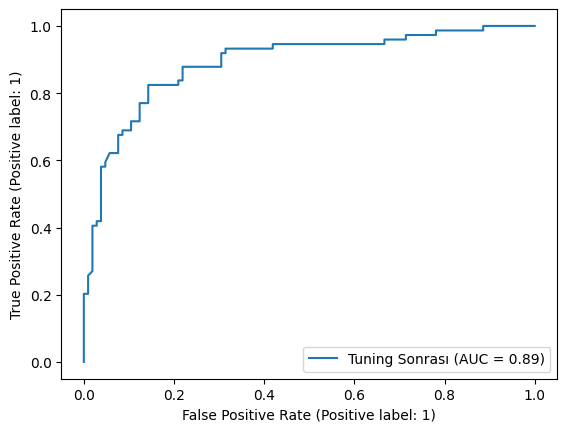

In [40]:
#tuning sonrası lightgbm roc auc skoru

from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, RocCurveDisplay

y_pred_tuned = best_lgb.predict(x_val_scaled)
y_proba_tuned = best_lgb.predict_proba(x_val_scaled)[:,1]

print("Tuning Sonrası Accuracy:", accuracy_score(y_val, y_pred_tuned))
print("Tuning Sonrası Confusion Matrix:\n", confusion_matrix(y_val, y_pred_tuned))
print("Tuning Sonrası ROC AUC:", roc_auc_score(y_val, y_proba_tuned))

# ROC eğrisini çizdirme
RocCurveDisplay.from_estimator(best_lgb, x_val_scaled, y_val, name="Tuning Sonrası")


<Figure size 1000x800 with 0 Axes>

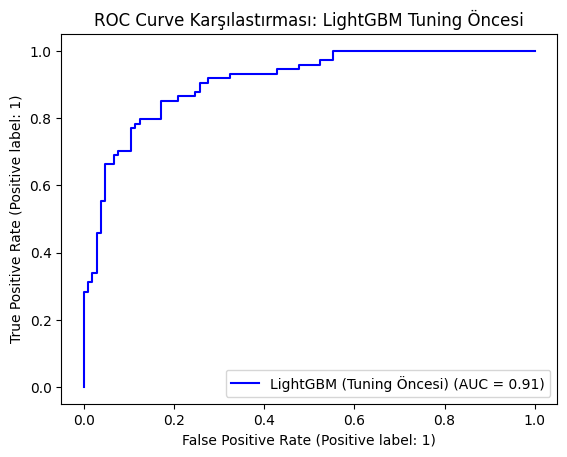

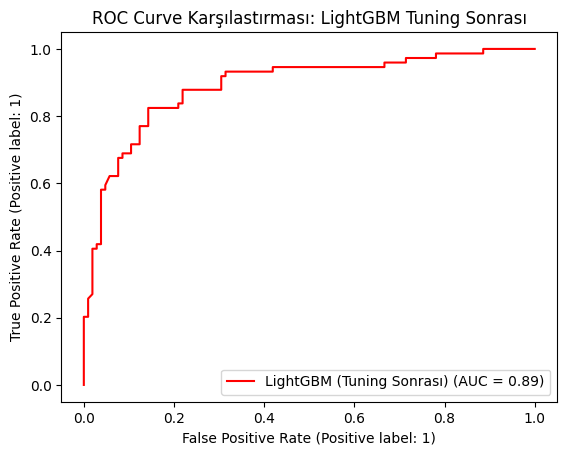

In [41]:
#karşılaştıralım

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Tuning öncesi modeli yeniden fit et
lgb_model.fit(x_train_scaled, y_train)

# Tahmin olasılıklarını al
y_proba_before = lgb_model.predict_proba(x_val_scaled)[:,1] # Tuning öncesi
y_proba_after = best_lgb.predict_proba(x_val_scaled)[:,1] # Tuning sonrası

plt.figure(figsize=(10,8))

# Tuning öncesi ROC
RocCurveDisplay.from_predictions(y_val, y_proba_before, name="LightGBM (Tuning Öncesi)", color="blue")
plt.title("ROC Curve Karşılastırması: LightGBM Tuning Öncesi")
plt.savefig("roc_comparison_before.png")


# Tuning sonrası ROC
RocCurveDisplay.from_predictions(y_val, y_proba_after, name="LightGBM (Tuning Sonrası)", color="red")

plt.title("ROC Curve Karşılastırması: LightGBM Tuning Sonrası")
plt.savefig("roc_comparison_after.png")  # png olarak kaydet
plt.show()

In [42]:
### SONUÇÇÇÇÇ

#GridSearchCV ile LightGBM modeli tuning ettik ama küçük veri seti nedeniyle ROC AUC değeri tuning öncesine göre hafifçe düştü
#küçük veri setlerinde model performansının alt gruplara göre değişmesinden kaynaklanmakta çok detaylı tuning yapmak çoğu zaman gereksiz ve riskli olabilir
#Genel olarak modelimiz hâlâ yüksek performans göstermektedir ve proje bu haliyle bırakılabilir diye düşünüyorum 

#Titanic veri seti üzerinde farklı makine öğrenmesi modelleri (Logistic Regression, KNN, Decision Tree, Random Forest, Naive Bayes, SVM, XGBoost, LightGBM) denenmiştir
#Model performansları Accuracy ve ROC AUC skorları ile değerlendirilmiş
#en iyi sonuç LightGBM modelinde elde edilmiştir (Accuracy ≈ 0.84, ROC AUC ≈ 0.91)
#LightGBM modeli GridSearchCV ile parametre optimizasyonu sağlandı
#küçük veri seti nedeniyle ROC AUC’de hafif bir düşüş gözlendi (0.91 → 0.90)
#Bu proje; veri ön işleme, farklı model denemeleri ve model performansının değerlendirilmesini doğru şekilde gösteren bir çalışma olarak tamamlamaya çalıştım umarım yanlışım yoktur
